In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import tensorflow as tf
import numpy as np

In [2]:
print(f"tensorflow Version {tf.__version__}")
print(f"keras Version {tf.keras.__version__}")

tensorflow Version 2.12.0
keras Version 2.12.0


In [3]:
os.getcwd()

'/content'

In [4]:
device=["GPU","CPU"]

In [5]:
for i in device:
  out=tf.config.list_physical_devices(i)
  if len(out) > 0:
    print(f"{i} is available")
    print(f"details --- {out}")
  else:
    print(f"{i} is not available")

GPU is available
details --- [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
CPU is available
details --- [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


Load The MNIST Dataset from keras

In [6]:
mnist=tf.keras.datasets.mnist

In [7]:
type(mnist)

module

In [8]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [11]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Make Validation Data from train Data




In [12]:
#Here data is range from 0 to 255

In [13]:
x_valid,x_train=x_train[:5000]/255,x_train[5000:]/255
y_valid,y_train=y_train[:5000]/255,y_train[5000:]
x_test=x_test/255

See How Our data looks For Human

<function matplotlib.pyplot.show(close=None, block=None)>

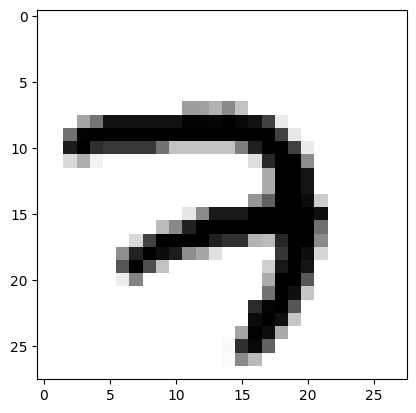

In [14]:
plt.imshow(x_train[0],cmap='binary')
plt.show

See How Our Data looks For Computer

<Axes: >

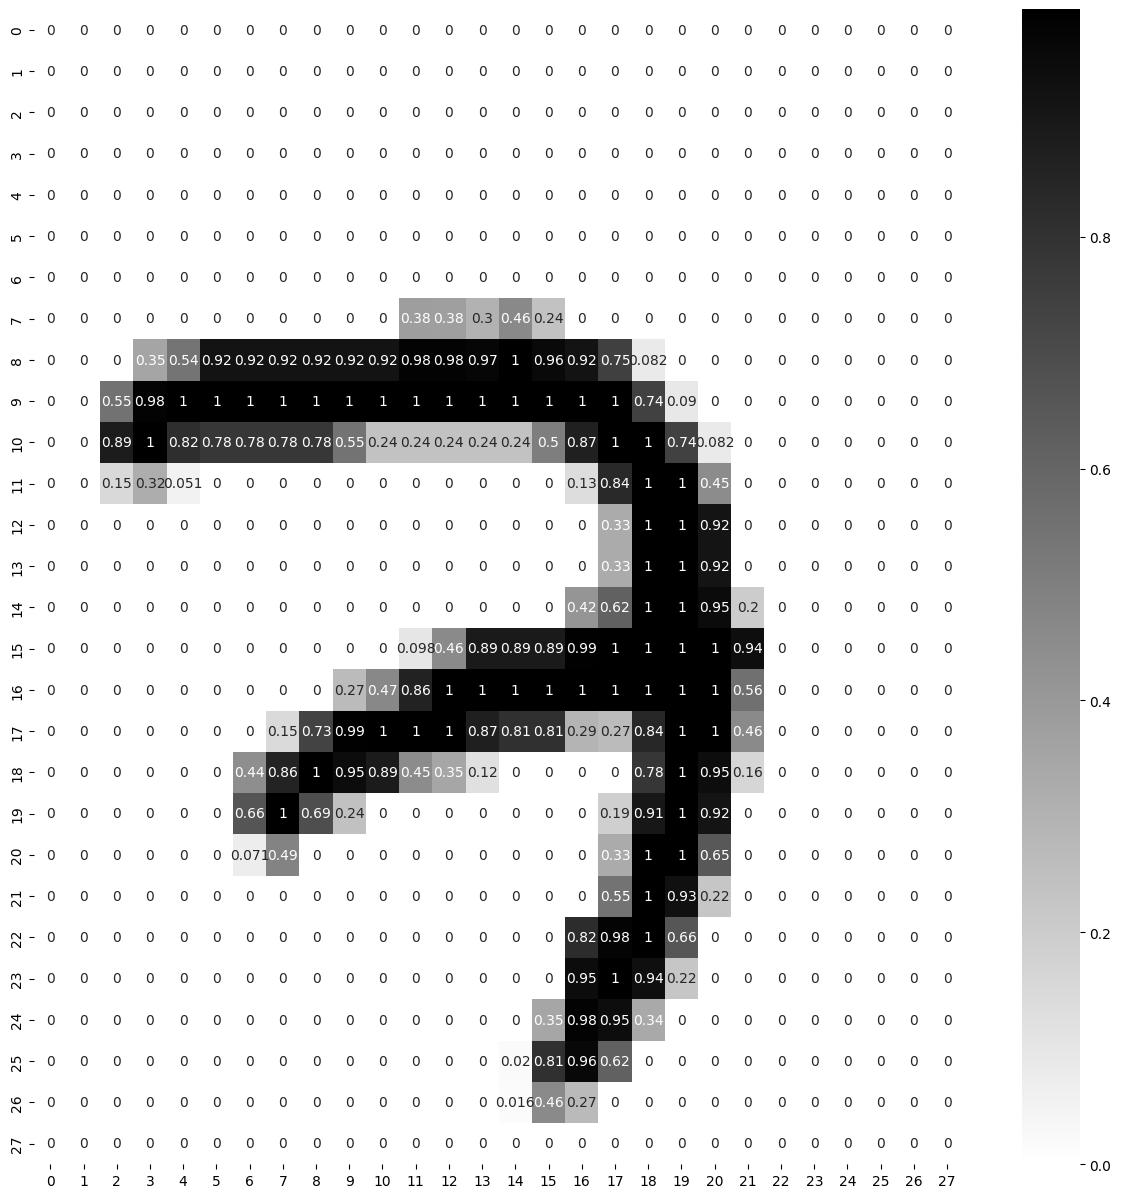

In [17]:
plt.figure(figsize=(15,15))
sns.heatmap(x_train[0],annot=True,cmap='binary')

Here we Use ANN
Define Layers

In [19]:
Layer=[tf.keras.layers.Flatten(input_shape=[28,28],name="inputlayer"),
       tf.keras.layers.Dense(300,activation="relu",name="hidenlayer1"),
       tf.keras.layers.Dense(100,activation="relu",name="hidenlayer2"),
       tf.keras.layers.Dense(10,activation="softmax",name="outputlayer")

]
model_clf=tf.keras.Sequential(Layer)


In [20]:
model_clf.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hidenlayer1 (Dense)         (None, 300)               235500    
                                                                 
 hidenlayer2 (Dense)         (None, 100)               30100     
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [23]:
LOSS="sparse_categorical_crossentropy"
OPTIMIZER="SGD"
METRIC=["accuracy"]
model_clf.compile(loss=LOSS,optimizer=OPTIMIZER,metrics=METRIC)

In [24]:
history=model_clf.fit(x_train,y_train,epochs=30,batch_size=32,validation_data=[x_train,y_train])

Epoch 1/30
1719/1719 [==============================] - 14s 5ms/step - loss: 0.6072 - accuracy: 0.8401 - val_loss: 0.3274 - val_accuracy: 0.9050
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2866 - accuracy: 0.9185 - val_loss: 0.2538 - val_accuracy: 0.9282
Epoch 3/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2348 - accuracy: 0.9335 - val_loss: 0.2131 - val_accuracy: 0.9388
Epoch 4/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2016 - accuracy: 0.9422 - val_loss: 0.1877 - val_accuracy: 0.9471
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1766 - accuracy: 0.9498 - val_loss: 0.1610 - val_accuracy: 0.9537
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1573 - accuracy: 0.9555 - val_loss: 0.1486 - val_accuracy: 0.9568
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1415 - accuracy: 0.9604 - val_loss: 0.1313 - val_accura

In [25]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [29]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.607190,0.840091,0.327439,0.905036
1,0.286595,0.918545,0.253771,0.928218
2,0.234818,0.933509,0.213138,0.938836
3,0.201591,0.942200,0.187659,0.947091
4,0.176554,0.949800,0.160979,0.953745
5,0.157271,0.955455,0.148637,0.956800
6,0.141511,0.960382,0.131320,0.963509
7,0.128114,0.963764,0.120065,0.966345
8,0.117240,0.967127,0.106915,0.970691
9,0.107507,0.969545,0.098993,0.972527


<Axes: >

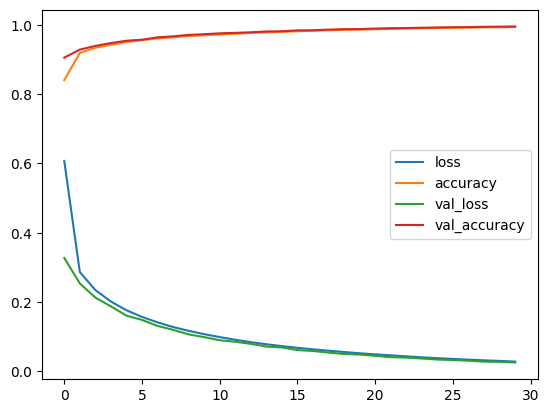

In [31]:
pd.DataFrame(history.history).plot()

In [32]:
model_clf.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0709 - accuracy: 0.9788


[0.0708618015050888, 0.9787999987602234]

Sample Test

In [33]:
new_x=x_test[110:115]
new_y=y_test[110:115]

In [35]:
new_x

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

    

In [36]:
new_y

array([8, 7, 3, 9, 7], dtype=uint8)

In [37]:
y_pred=model_clf.predict(new_x)
y_pred.round(2)

1/1 [==============================] - 0s 76ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.98, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ]],
      dtype=float32)

In [41]:
y_pred=np.argmax(y_pred,axis=-1)

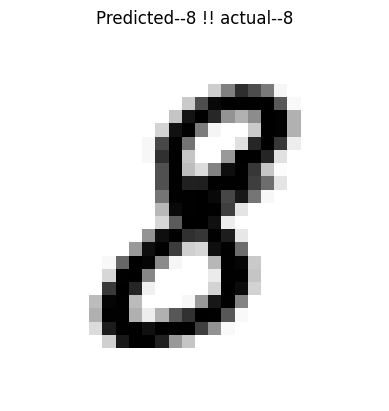

-----------------------------------------------------------------


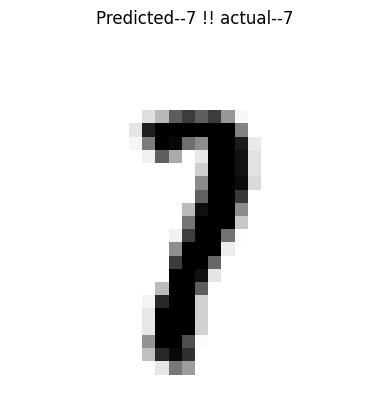

-----------------------------------------------------------------


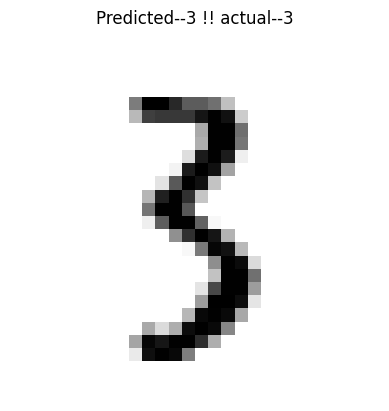

-----------------------------------------------------------------


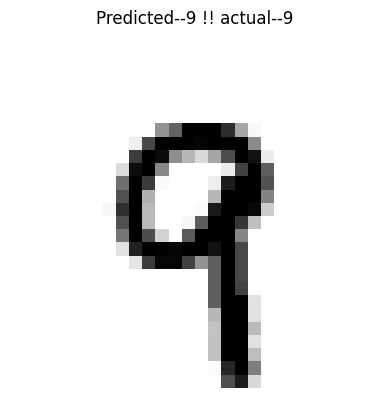

-----------------------------------------------------------------


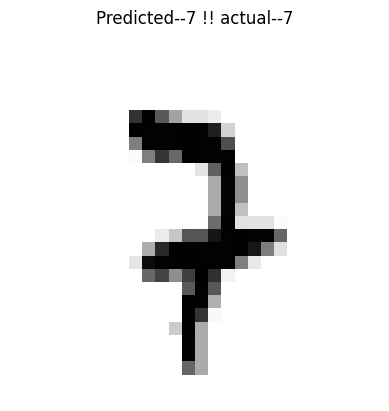

-----------------------------------------------------------------


In [44]:
for data ,pred,actual in zip(new_x,y_pred,new_y):
  plt.imshow(data,cmap="binary")
  plt.title(f"Predicted--{pred} !! actual--{actual}")
  plt.axis("off")
  plt.show()
  print("-----------------------------------------------------------------")